In [1]:
from import_library import *

In [2]:
data_path = r'data/'
save_path = f'results/'
file = 'credit_scoring.csv'

# Function

In [3]:
def read_file_csv(data_path,file):
    '''   
    Read csv file 
    ----------
    Attributes:
    file: file
    ----------
    Example:
    file = 'dataset.csv'
    data = read_file_csv(file)
    '''
    data = pd.read_csv(data_path + file, sep=',',header = 0)
    # data['Change %'] = data['Change %'].apply(convert_percentage_object_2_float)    
    return data
### Explanatory Data Analysis
def non_numerial_feauture_analysis(data, features):
    ncols = 2
    nrows = len(features) // ncols + 1
    fig, axes = plt.subplots(ncols = ncols, nrows = nrows, figsize=(12,10))
    for feature,idx in zip(features,range(len(features))) :        
        axl = sns.barplot(data[feature].value_counts(),
                        ax=axes[idx//ncols][idx%ncols],
                       )
        axl.grid()
    fig.tight_layout()
def univariate_dis_analysis(data,features):
    '''    
    Plot Univariate distribution plot
    ----------
    Attributes:
    data : pd.DataFrame                
    features: list
        list of features of the df_dataset
    save: bool, default: False
        save or not
    ----------
    Example:
    univariate_analysis(data,features)
    '''    
    n_cols = 4
    n_rows = int(math.ceil(len(features)/n_cols))    
    fig,axes = plt.subplots(nrows=n_rows , ncols= n_cols,figsize = (22,12))
    for idx, feature in enumerate(features):
        row,col = idx//n_cols, idx%n_cols 
        axl = sns.distplot(data[feature], ax = axes[row][col])        
        axl.grid()
    
def univariate_box_analysis(data,features,box =1, outlier = True):
    '''    
    Box plot of each features
    ----------
    Attributes:
    data : pd.DataFrame                
    features: list
        list of features of the df_dataset
    outlier: bool, default: True
        including outlier or not 
    save: bool, default: False
        save or not
    ----------
    Example:
    univariate_analysis(data,features)
    '''
    n_cols = 4
    n_rows = int(math.ceil(len(features)/n_cols))    
    fig,axes = plt.subplots(nrows=n_rows , ncols= n_cols,figsize = (22,12))
    for idx, feature in enumerate(features):
        row,col = idx//n_cols, idx%n_cols 
        if box == 1:
            axl = sns.boxplot(data[feature],ax = axes[row][col],showfliers = outlier )
            axl.grid()
        else:
            axl = sns.violinplot(data[feature],ax = axes[row][col] )
            axl.grid()  

def outlier_removal(data,features):
    '''
    Remove outlier of each feature
    ----------
    Attributes:
    data : pd.DataFrame                
    features: list
        list of features of the df_dataset
    outlier: bool, default: True
        including outlier or not 
    save: bool, default: False
        save or not
    ----------
    Results:
    filtered_df: pd.DataFrame
    df_outlier: pd.DataFrame
    ----------
    Example:
    univariate_analysis(data,features)
    '''
    df_outlier = pd.DataFrame()
    for feature in features:
        Q1 = data[feature].quantile(0.25)
        Q3 = data[feature].quantile(0.75)
        IQR = Q3 - Q1
        outlier_range = Q1-1.5*IQR , Q3+1.5*IQR
        cond = (data[feature] < outlier_range[0]) | (data[feature] > outlier_range[1])
        outliers = data[cond]
        df_outlier = pd.concat([df_outlier, outliers])
    df_outlier.drop_duplicates(inplace=True)
    
    filtered_df = data.drop(data_outlier.index.to_list())
    filtered_df.reset_index(drop=True,inplace=True)
    return filtered_df,df_outlier

def correlation_matrix(data,title=None,save=False):
    '''    
    Plot Correlation Matrix
    ----------
    Attributes:
    df_smoothed_scaled_filterd_dataset : pd.DataFrame                
    orderedFeatured: list
        list of features of the df_dataset
    title: str, default: None
        The name of saved file
    save: bool, default: False
        save or not
    ----------
    Example:
    CorrelationMatrix(df_smoothed_scaled_filterd_dataset,orderedFeatured,title=None,save=False)
    '''    
    plt.close('all')
    train = data
    plt.figure(figsize=(20, 20))
    dataplot = sns.heatmap(train.corr(), xticklabels=train.corr().columns, yticklabels=train.corr().columns,  cmap="YlGnBu", annot=True)
    if title == None:
        title = 'corr.png'    
    if save:
        if not os.path.exists(f'{save_path}/'):
            os.makedirs( f'{save_path}/')  
        plt.savefig(f'{save_path}/{title}', bbox_inches="tight")    
    plt.show()

### Model 
def model_fitting(model,trainX,trainY,testX,testY):
    '''
    Model Fitting 
    ----------
    Attributes:
    model : machine learning framework
    trainX,trainY,testX,testY: input data
    ----------
    Return:
    model.score: Accuracy on the Test Set
    model : machine learning framework
    ----------    
    Example:
    lr = LogisticRegression()# before fitting
    lr, lr_score = model_fitting(lr, trainX, trainY, testX, testY)
    '''
    model.fit(trainX,trainY)    
    
    return model,model.score(testX,testY)

def model_evalution_report(model, trainX, trainY, testX, testY):
    '''    
    Model Evaluation Report
    ----------
    Attributes:
    model : machine learning framework
    trainX,trainY,testX,testY: input data
    ----------
    Example:
    model_evalution_report(lr, trainX, trainY, testX, testY)
    '''   
    print(f'Training Accuracy : {model.score(trainX,trainY):.3f}',)
    print(f'Testing Accuracy : {model.score(testX,testY):.3f}',)
    con_mat = pd.DataFrame(confusion_matrix(testY, model.predict(testX) ),
                columns = ['Predicted:0', 'Predicted:1'],
                index = ['Actual:0', 'Actual:1'])
    
    
    print('\nCLASSIFICATION REPORT\n')
    print(classification_report(testY, model.predict(testX),
                                target_names =['0','1']))
    
    print('\nCONFUSION MATRIX')
    plt.figure(figsize= (6,4))
    sns.heatmap(con_mat, annot = True,fmt='d',cmap="YlGnBu")
    

def model_evaluation_score(model, trainX, trainY, testX, testY):
    '''    
    Model evaluation score
    ----------
    Attributes:
    model : machine learning framework
    trainX,trainY,testX,testY: input data
    ----------  
    Results:
    Accuracy, F1-score, recall, precision, specificity on the test set
    ----------  
    Example:
    model = 'Logistic Regression'
    acc_test,f1_score_test,recall_score_test,precision_score_test,specificity_score_test = model_evaluation_score(lr, trainX, trainY, testX, testY)
    '''   
    predict_trainX = model.predict(trainX)
    predict_testX = model.predict(testX)
    
    
    acc_train = metrics.accuracy_score(trainY,predict_trainX)
    acc_test = metrics.accuracy_score(testY,predict_testX)
    
    f1_score_train = metrics.f1_score(trainY,predict_trainX)
    f1_score_test = metrics.f1_score(testY,predict_testX)
        
    tp, fn, fp, tn = confusion_matrix(testY, predict_testX).ravel()         
    specificity_score_test = tn / (tn+fp)
    precision_score_test = tp/ (tp+fp)
    recall_score_test = tp/(tp+fn)
    
    return acc_test,f1_score_test,recall_score_test,precision_score_test, specificity_score_test

def save_model(model,save_path,title):
    '''    
    Save Model
    ----------
    Attributes:
    model : model from ML
    save_path: saving repository
    title: str  
    ----------     
    Example:
    title = 'RFR_8field_Tuned_model.sav'
    save_model(model,save_path,title)
    '''    
    if not os.path.exists(f'{save_path}/model'):
        os.makedirs( f'{save_path}/model')
    file_name = f'{save_path}/model/{title}'
    with open(file_name, 'wb') as f:
        pickle.dump(model,f)    
        
def load_model(save_path,title):
    '''    
    Load Model
    ----------
    Attributes:
    save_path: loading repository
    title: str  
    ----------     
    Example:
    title = 'RFR_8field_Tuned_model.sav'
    loaded_model = load_model(save_path,title)
    '''    
    file_name = f'{save_path}/model/{title}'
    with open(file_name,'rb') as f:
        model = pickle.load(f)
    return model




# Main

In [4]:
data = read_file_csv(data_path,file)
data.shape

(1000, 12)

Shape of data: (1000,12)

**Description of All features **

(1). Age: This feature represents the age of the individual.

(2). Gender: This feature captures the gender of the individual.

(3). Marital Status: This feature denotes the marital status of the individual.

(4). Education Level: This feature represents the highest level of education attained by the individual.

(5). Employment Status: This feature indicates the current employment status of the individual.

(6). Credit Utilization Ratio: This feature reflects the ratio of credit used by the individual compared to their total available credit limit.

(7). Payment History: It represents the monthly net payment behaviour of each customer, taking into account factors such as on-time payments, late payments, missed payments, and defaults.

(8). Number of Credit Accounts: It represents the count of active credit accounts the person holds.

(9). Loan Amount: It indicates the monetary value of the loan.

(10). Interest Rate: This feature represents the interest rate associated with the loan.

(11). Loan Term: This feature denotes the duration or term of the loan.

(12). Type of Loan: It includes categories like “Personal Loan,” “Auto Loan,” or potentially other types of loans.

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Age                        1000 non-null   int64  
 1   Gender                     1000 non-null   object 
 2   Marital Status             1000 non-null   object 
 3   Education Level            1000 non-null   object 
 4   Employment Status          1000 non-null   object 
 5   Credit Utilization Ratio   1000 non-null   float64
 6   Payment History            1000 non-null   float64
 7   Number of Credit Accounts  1000 non-null   int64  
 8   Loan Amount                1000 non-null   int64  
 9   Interest Rate              1000 non-null   float64
 10  Loan Term                  1000 non-null   int64  
 11  Type of Loan               1000 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 93.9+ KB


float type (3) : Credit Utilization Ratio/ Payment History/ Interest Rate

int type (4): Age/Number of Credit Accounts / Loan Amount / Loan Term 

object(5) : Gender/ Marital Status/ Education Level/ Employment Status/ Type of Loan 

In [6]:
data.isnull().sum()

Age                          0
Gender                       0
Marital Status               0
Education Level              0
Employment Status            0
Credit Utilization Ratio     0
Payment History              0
Number of Credit Accounts    0
Loan Amount                  0
Interest Rate                0
Loan Term                    0
Type of Loan                 0
dtype: int64

--> No missing data

In [7]:
data.columns.to_list()

['Age',
 'Gender',
 'Marital Status',
 'Education Level',
 'Employment Status',
 'Credit Utilization Ratio',
 'Payment History',
 'Number of Credit Accounts',
 'Loan Amount',
 'Interest Rate',
 'Loan Term',
 'Type of Loan']

# Explanatory Data Analysis (EDA)

## Univariate Analysis

### Non-numerical Featres

In [8]:
non_numerial_feature = ['Gender','Marital Status','Education Level','Employment Status','Type of Loan']


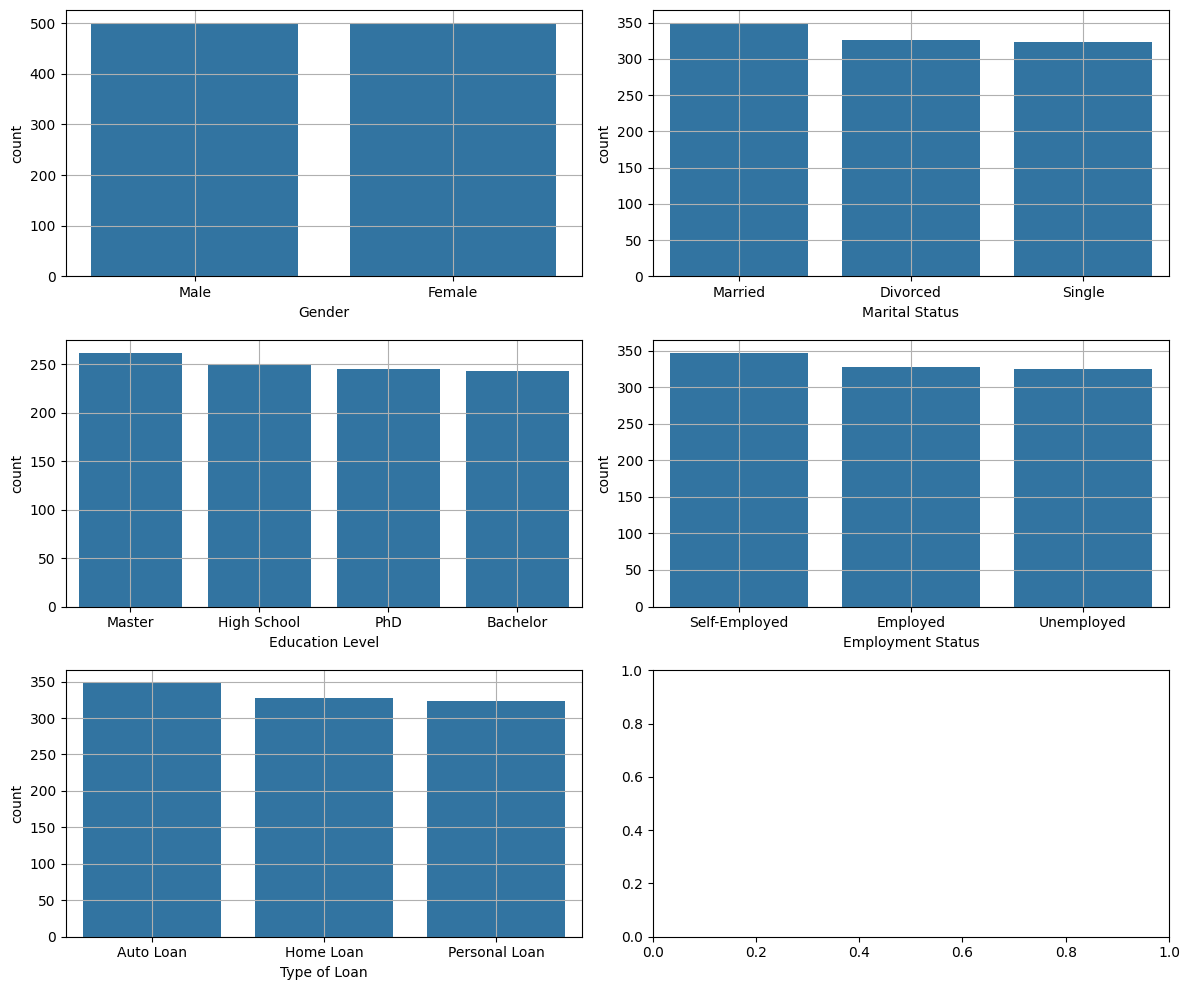

In [9]:
non_numerial_feauture_analysis(data, non_numerial_feature)

### Numerical analysis

In [10]:
numerical_features = ['Age','Credit Utilization Ratio','Payment History','Number of Credit Accounts','Loan Amount','Interest Rate','Loan Term']
data.describe()

,Age,Credit Utilization Ratio,Payment History,Number of Credit Accounts,Loan Amount,Interest Rate,Loan Term
count,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00
mean,42.70,0.51,1452.81,5.58,2471401.00,10.69,37.13
std,13.27,0.29,827.93,2.93,1387046.68,5.48,17.44
min,20.00,0.00,0.00,1.00,108000.00,1.01,12.00
25%,31.00,0.25,763.75,3.00,1298000.00,6.02,24.00
50%,42.00,0.53,1428.00,6.00,2437500.00,10.71,36.00
75%,54.00,0.75,2142.00,8.00,3653250.00,15.44,48.00
max,65.00,1.00,2857.00,10.00,4996000.00,19.99,60.00


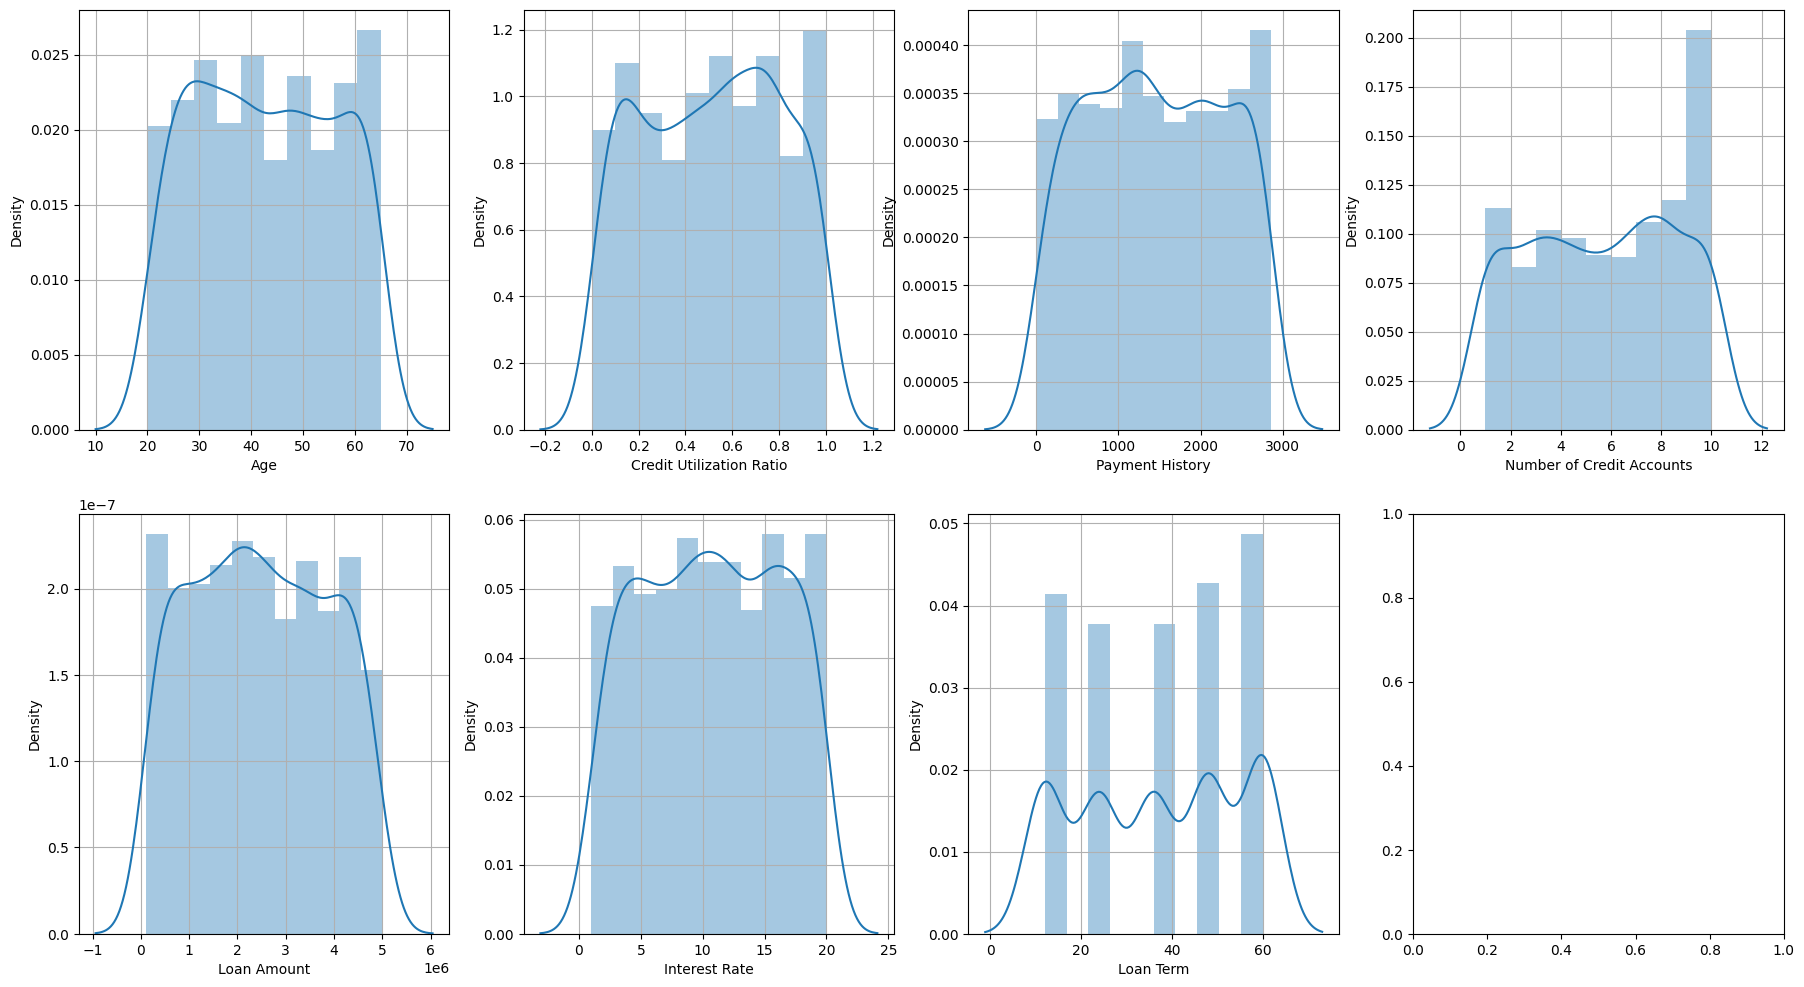

In [11]:
univariate_dis_analysis(data,numerical_features)

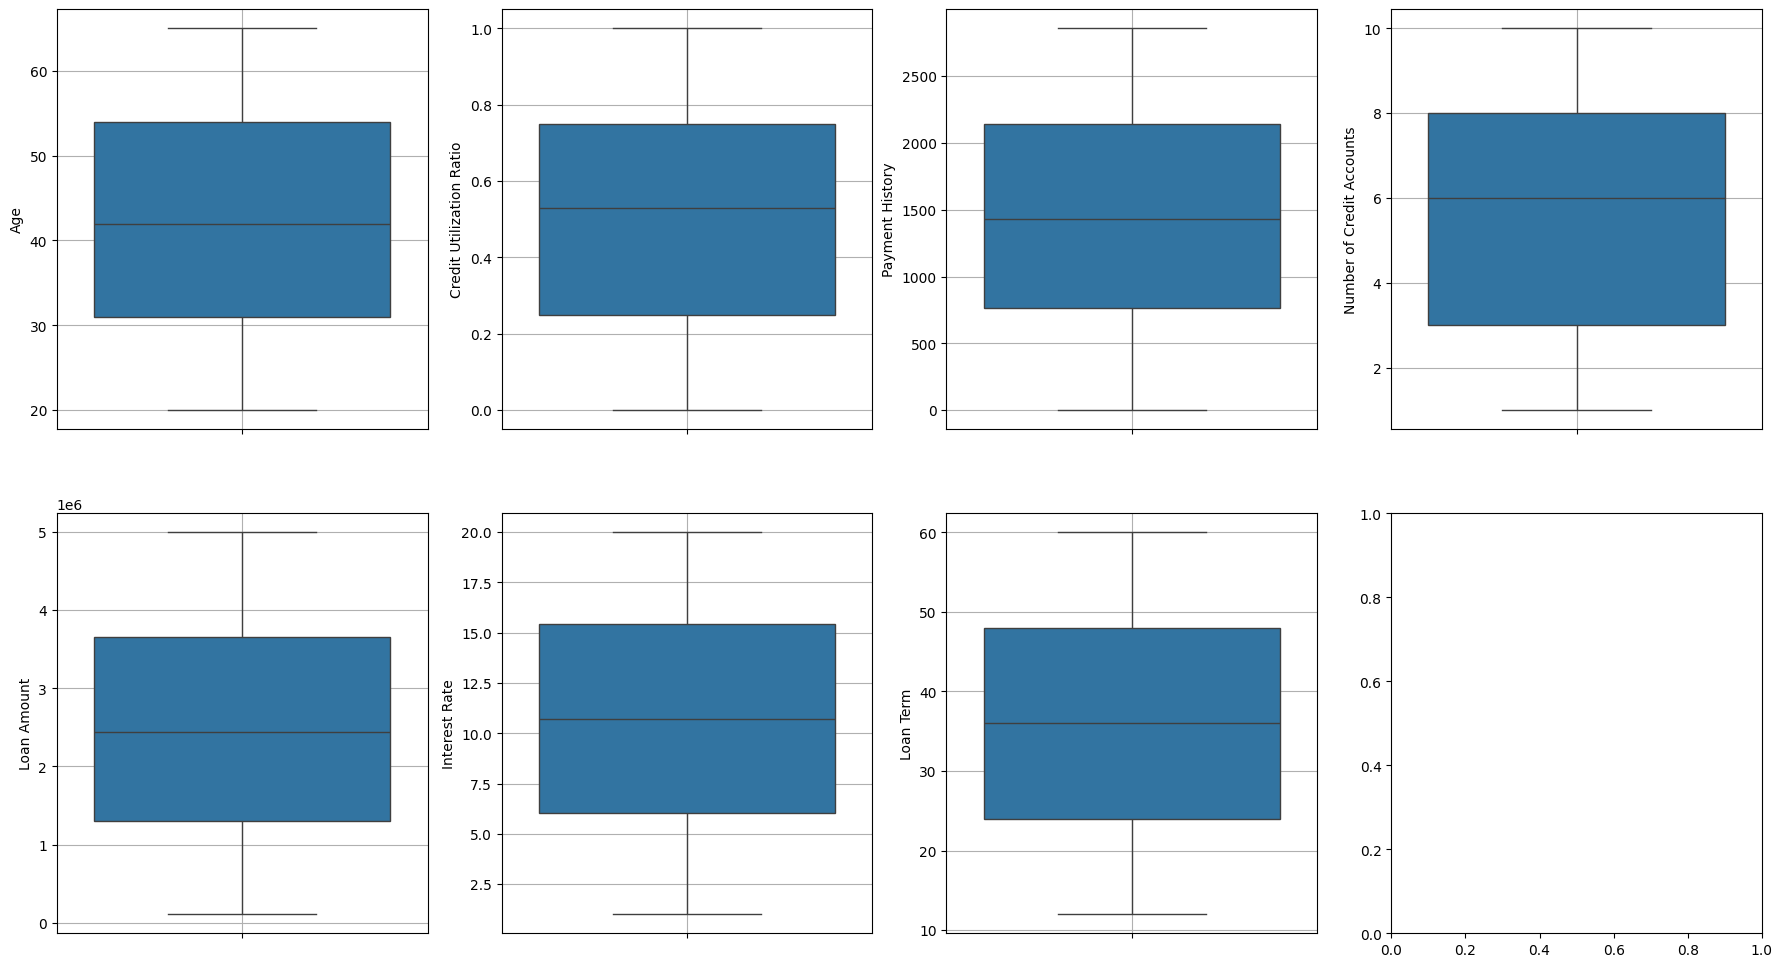

In [12]:
univariate_box_analysis(data,numerical_features,box = 1, outlier = True)

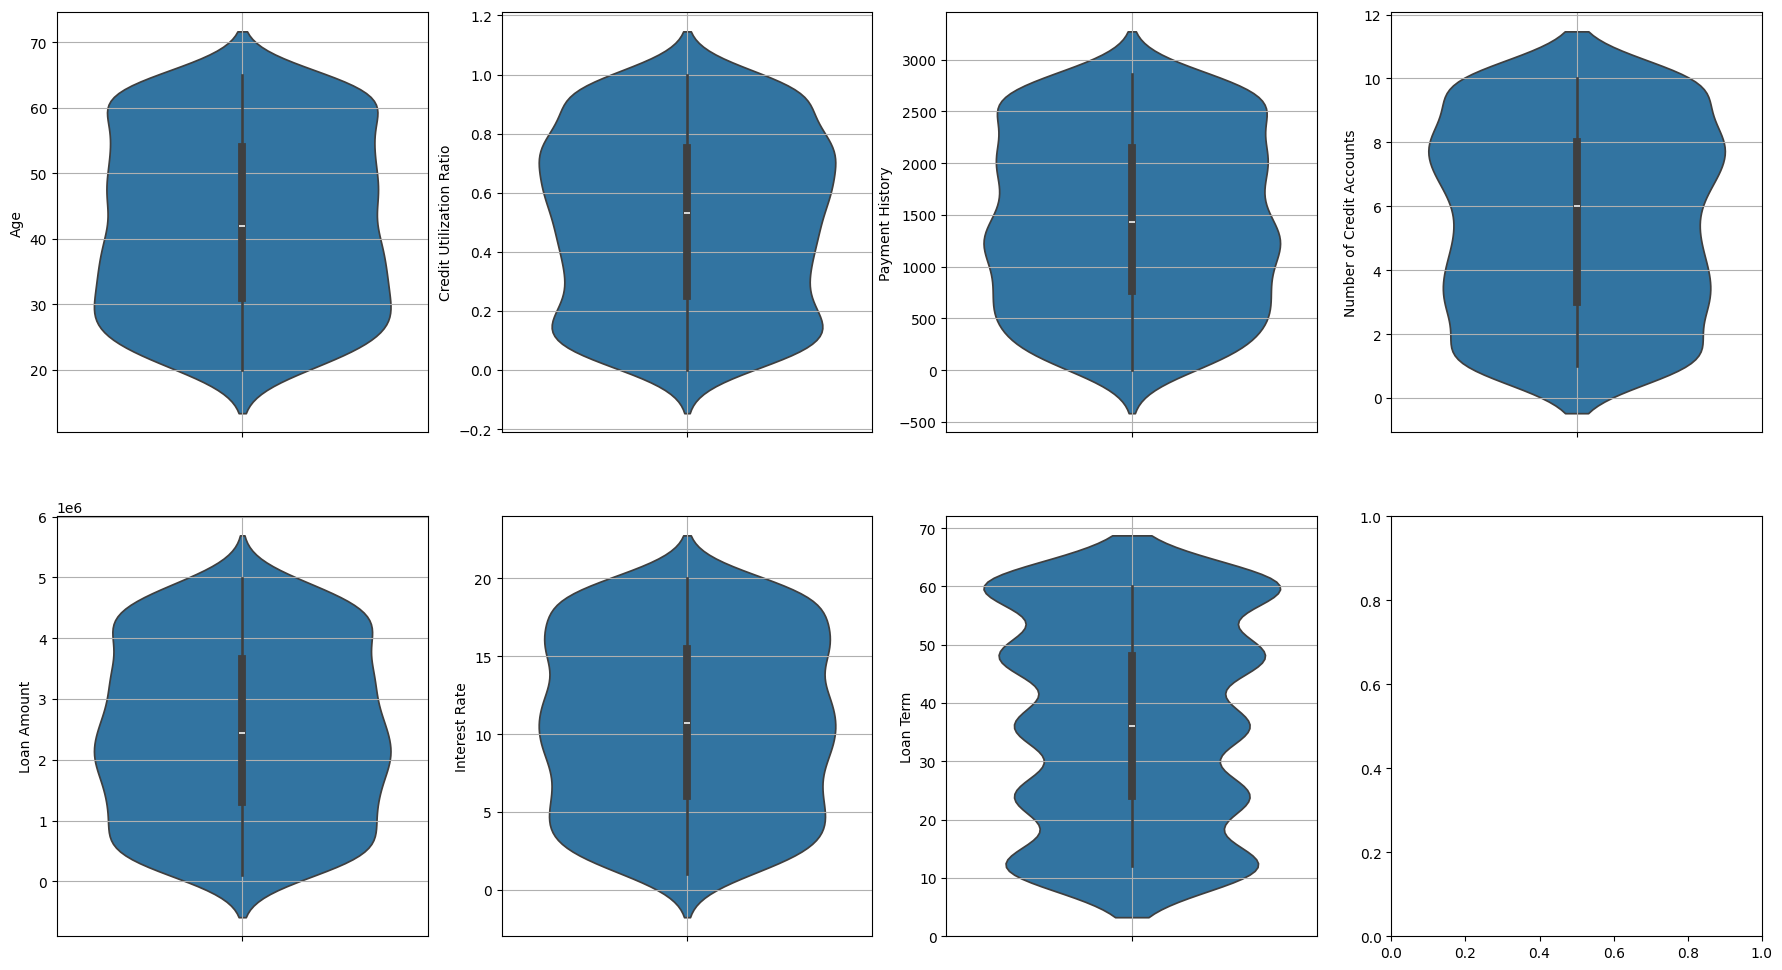

In [13]:
univariate_box_analysis(data,numerical_features,box = 0, outlier = True)

--> No outlier  --> No need to data transformation

# Bivariate Analysis

In [14]:
data.head()

,Age,Gender,Marital Status,Education Level,Employment Status,Credit Utilization Ratio,Payment History,Number of Credit Accounts,Loan Amount,Interest Rate,Loan Term,Type of Loan
0,60,Male,Married,Master,Employed,0.22,2685.00,2,4675000,2.65,48,Personal Loan
1,25,Male,Married,High School,Unemployed,0.20,2371.00,9,3619000,5.19,60,Auto Loan
2,30,Female,Single,Master,Employed,0.22,2771.00,6,957000,2.76,12,Auto Loan
3,58,Female,Married,PhD,Unemployed,0.12,1371.00,2,4731000,6.57,60,Auto Loan
4,32,Male,Married,Bachelor,Self-Employed,0.99,828.00,2,3289000,6.28,36,Personal Loan


In [15]:
data.tail()

,Age,Gender,Marital Status,Education Level,Employment Status,Credit Utilization Ratio,Payment History,Number of Credit Accounts,Loan Amount,Interest Rate,Loan Term,Type of Loan
995,59,Male,Divorced,High School,Employed,0.74,1285.00,8,3530000,12.99,48,Auto Loan
996,64,Male,Divorced,Bachelor,Unemployed,0.77,1857.00,2,1377000,18.02,60,Home Loan
997,63,Female,Single,Master,Self-Employed,0.18,2628.00,10,2443000,18.95,12,Personal Loan
998,51,Female,Married,PhD,Self-Employed,0.32,1142.00,3,1301000,1.80,24,Auto Loan
999,37,Female,Married,Master,Self-Employed,0.17,1028.00,5,4182000,9.34,24,Auto Loan


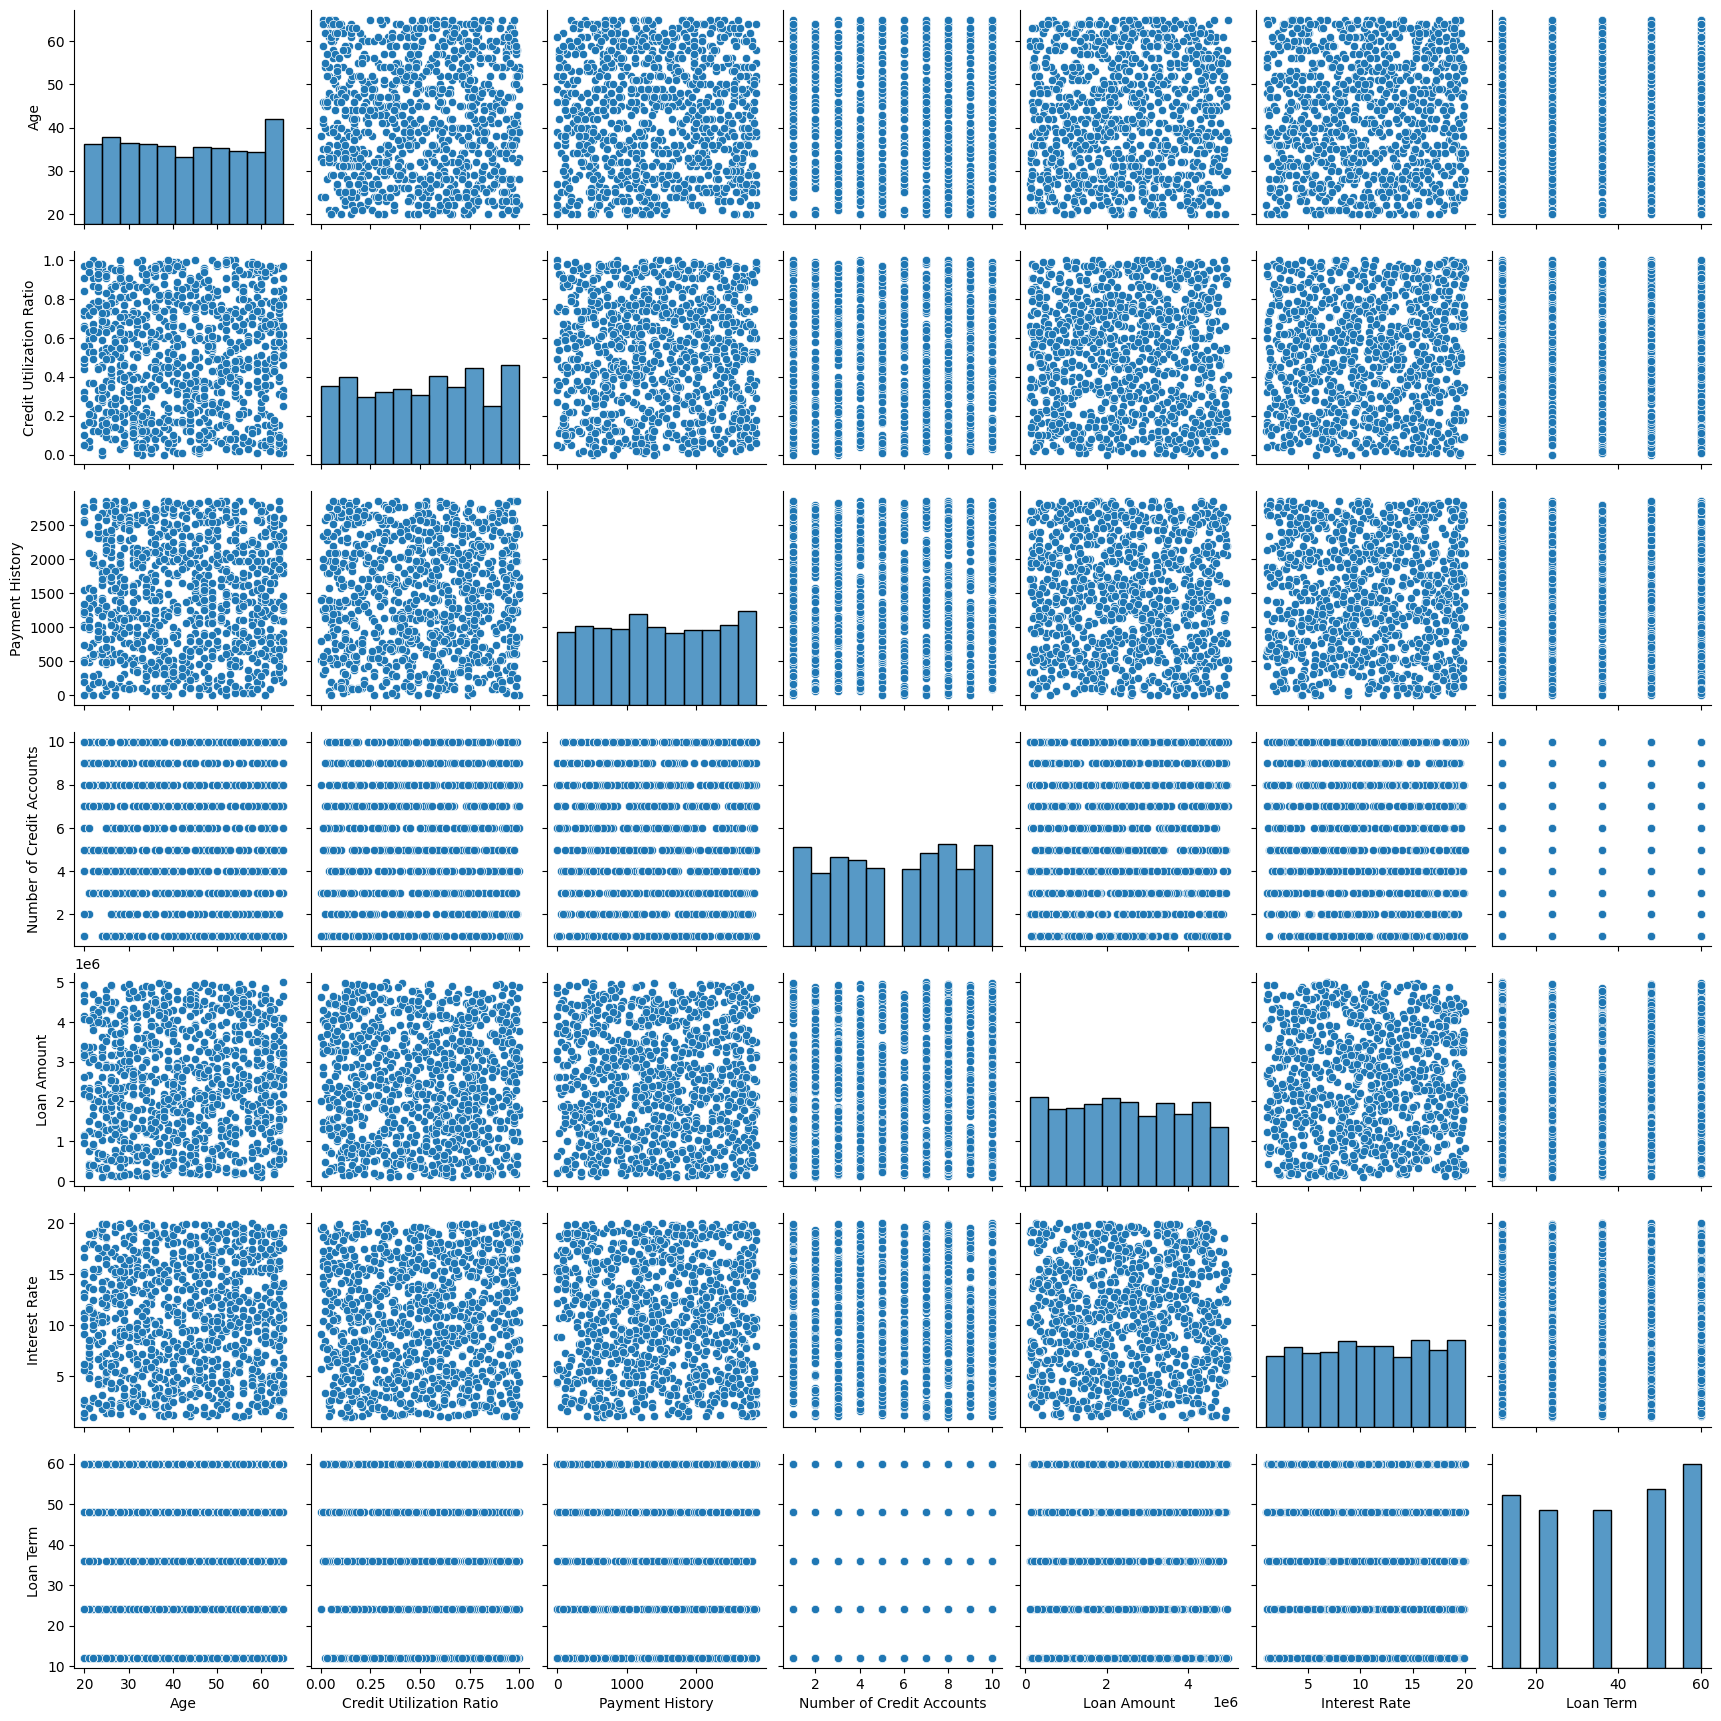

In [16]:
sns.pairplot(data)

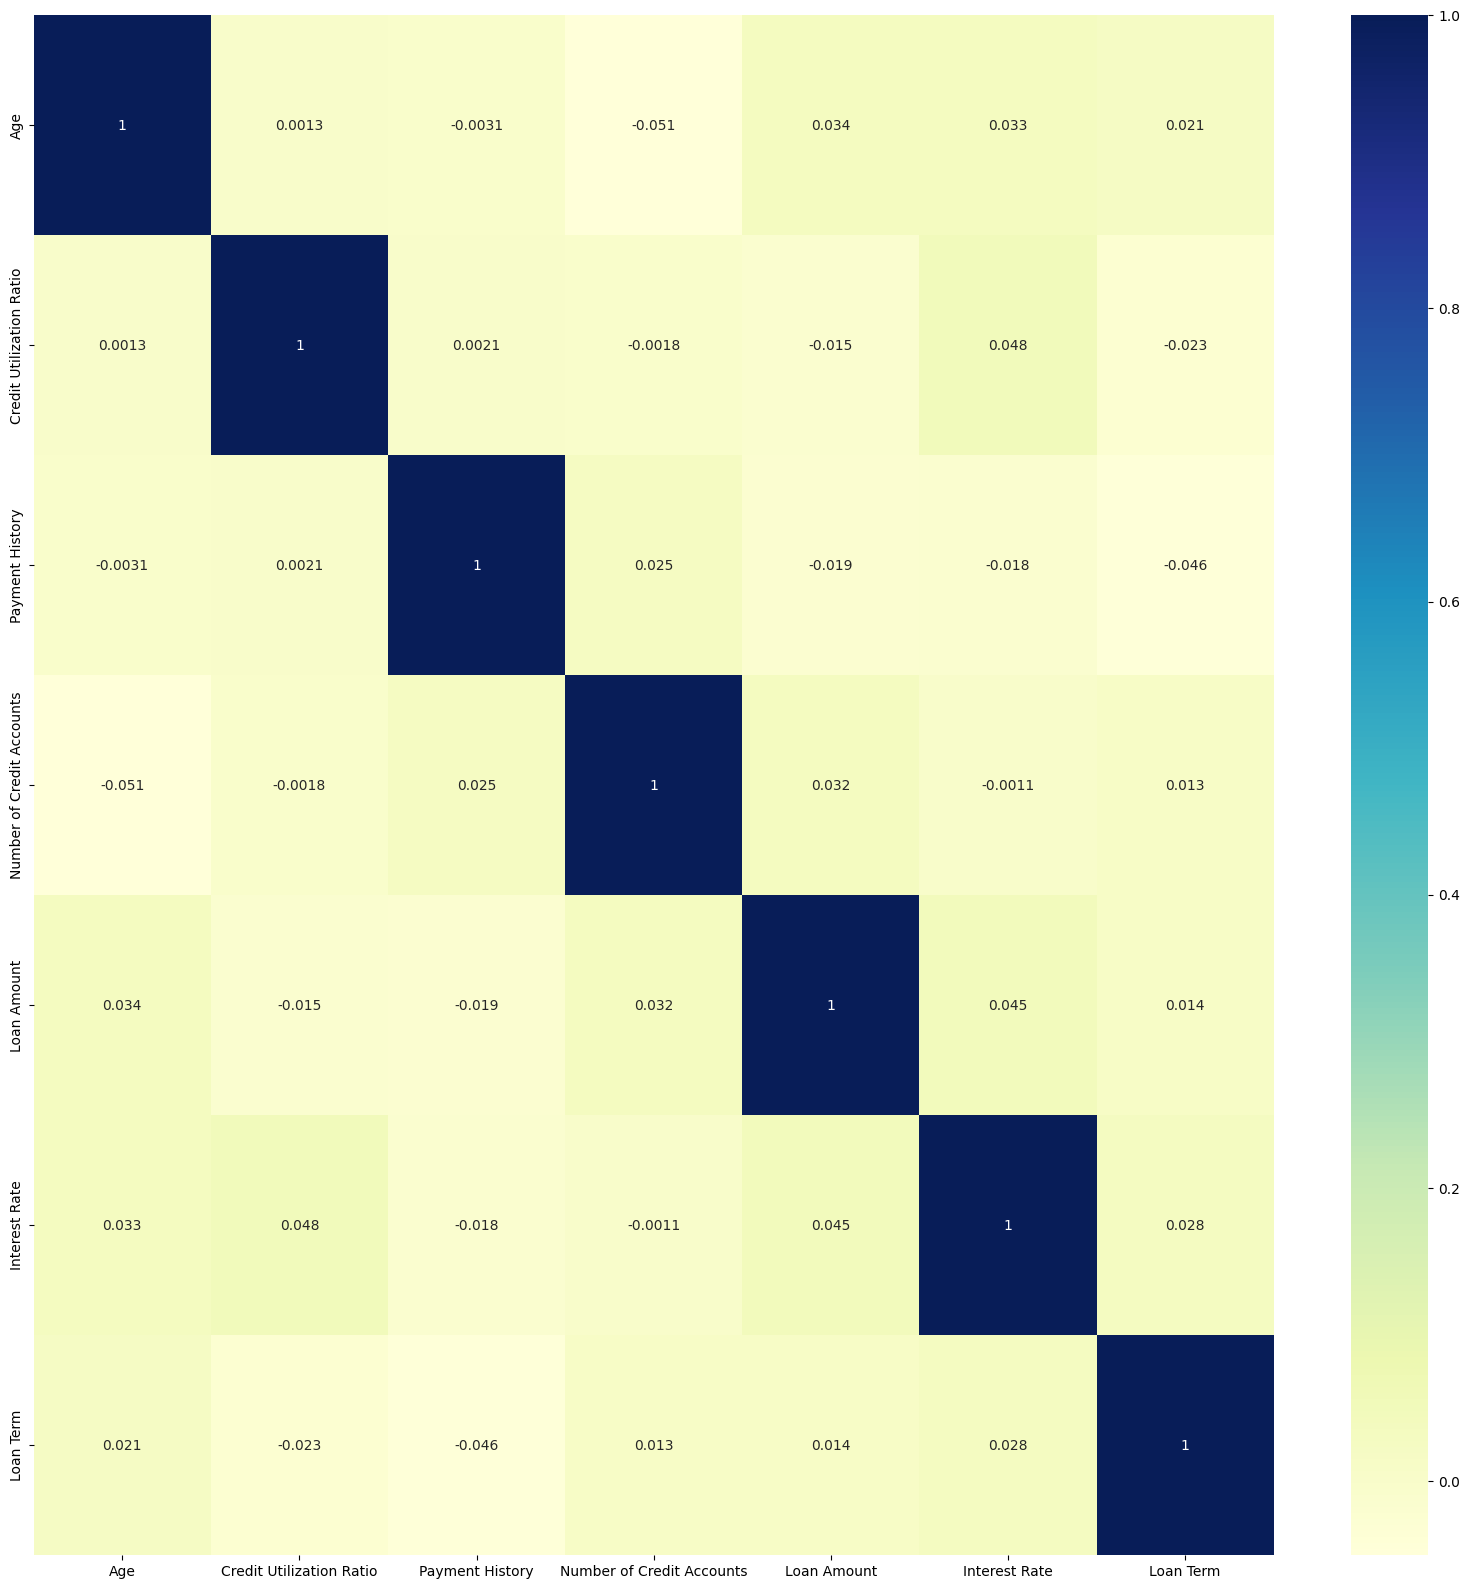

In [17]:
numerical_data = data.copy()[numerical_features] 
correlation_matrix(numerical_data)

# Data Transformation

In [18]:
from sklearn.preprocessing import OneHotEncoder

In [19]:
def encoding(data,features):
    one_hot=OneHotEncoder()
    new_features = ['G-F','G-M','MS-D','MS-M','MS-S','E-B','E-H','E-M','E-Phd','ES-E','ES-S','ES-U','L-A','L-H','L-P']
    new_encoded_data = np.zeros((len(data),1))
    for feature in features:
        data_reshape = np.array(data[feature]).reshape(-1,1)
        one_hot_Transformation = one_hot.fit_transform(data_reshape).toarray()
        new_encoded_data = np.hstack((new_encoded_data,one_hot_Transformation))
    # new_data = data.drop(columns = features)
    new_data = pd.concat([data.drop(columns = features), pd.DataFrame(new_encoded_data)], axis=1)
    new_data.drop(columns = [0],inplace=True)
    dict ={}
    for idx, row in enumerate(new_features):
        dict[idx+1] = row
    new_data.rename(dict,inplace=True,axis='columns')
    return new_data

In [20]:
dict

dict

In [21]:
new_data = encoding(data,non_numerial_feature)

In [22]:
new_data

,Age,Credit Utilization Ratio,Payment History,Number of Credit Accounts,Loan Amount,Interest Rate,Loan Term,G-F,G-M,MS-D,...,E-B,E-H,E-M,E-Phd,ES-E,ES-S,ES-U,L-A,L-H,L-P
0,60,0.22,2685.00,2,4675000,2.65,48,0.00,1.00,0.00,...,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00
1,25,0.20,2371.00,9,3619000,5.19,60,0.00,1.00,0.00,...,0.00,1.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00
2,30,0.22,2771.00,6,957000,2.76,12,1.00,0.00,0.00,...,0.00,0.00,1.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00
3,58,0.12,1371.00,2,4731000,6.57,60,1.00,0.00,0.00,...,0.00,0.00,0.00,1.00,0.00,0.00,1.00,1.00,0.00,0.00
4,32,0.99,828.00,2,3289000,6.28,36,0.00,1.00,0.00,...,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,59,0.74,1285.00,8,3530000,12.99,48,0.00,1.00,1.00,...,0.00,1.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00
996,64,0.77,1857.00,2,1377000,18.02,60,0.00,1.00,1.00,...,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00
997,63,0.18,2628.00,10,2443000,18.95,12,1.00,0.00,0.00,...,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00
998,51,0.32,1142.00,3,1301000,1.80,24,1.00,0.00,0.00,...,0.00,0.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,0.00


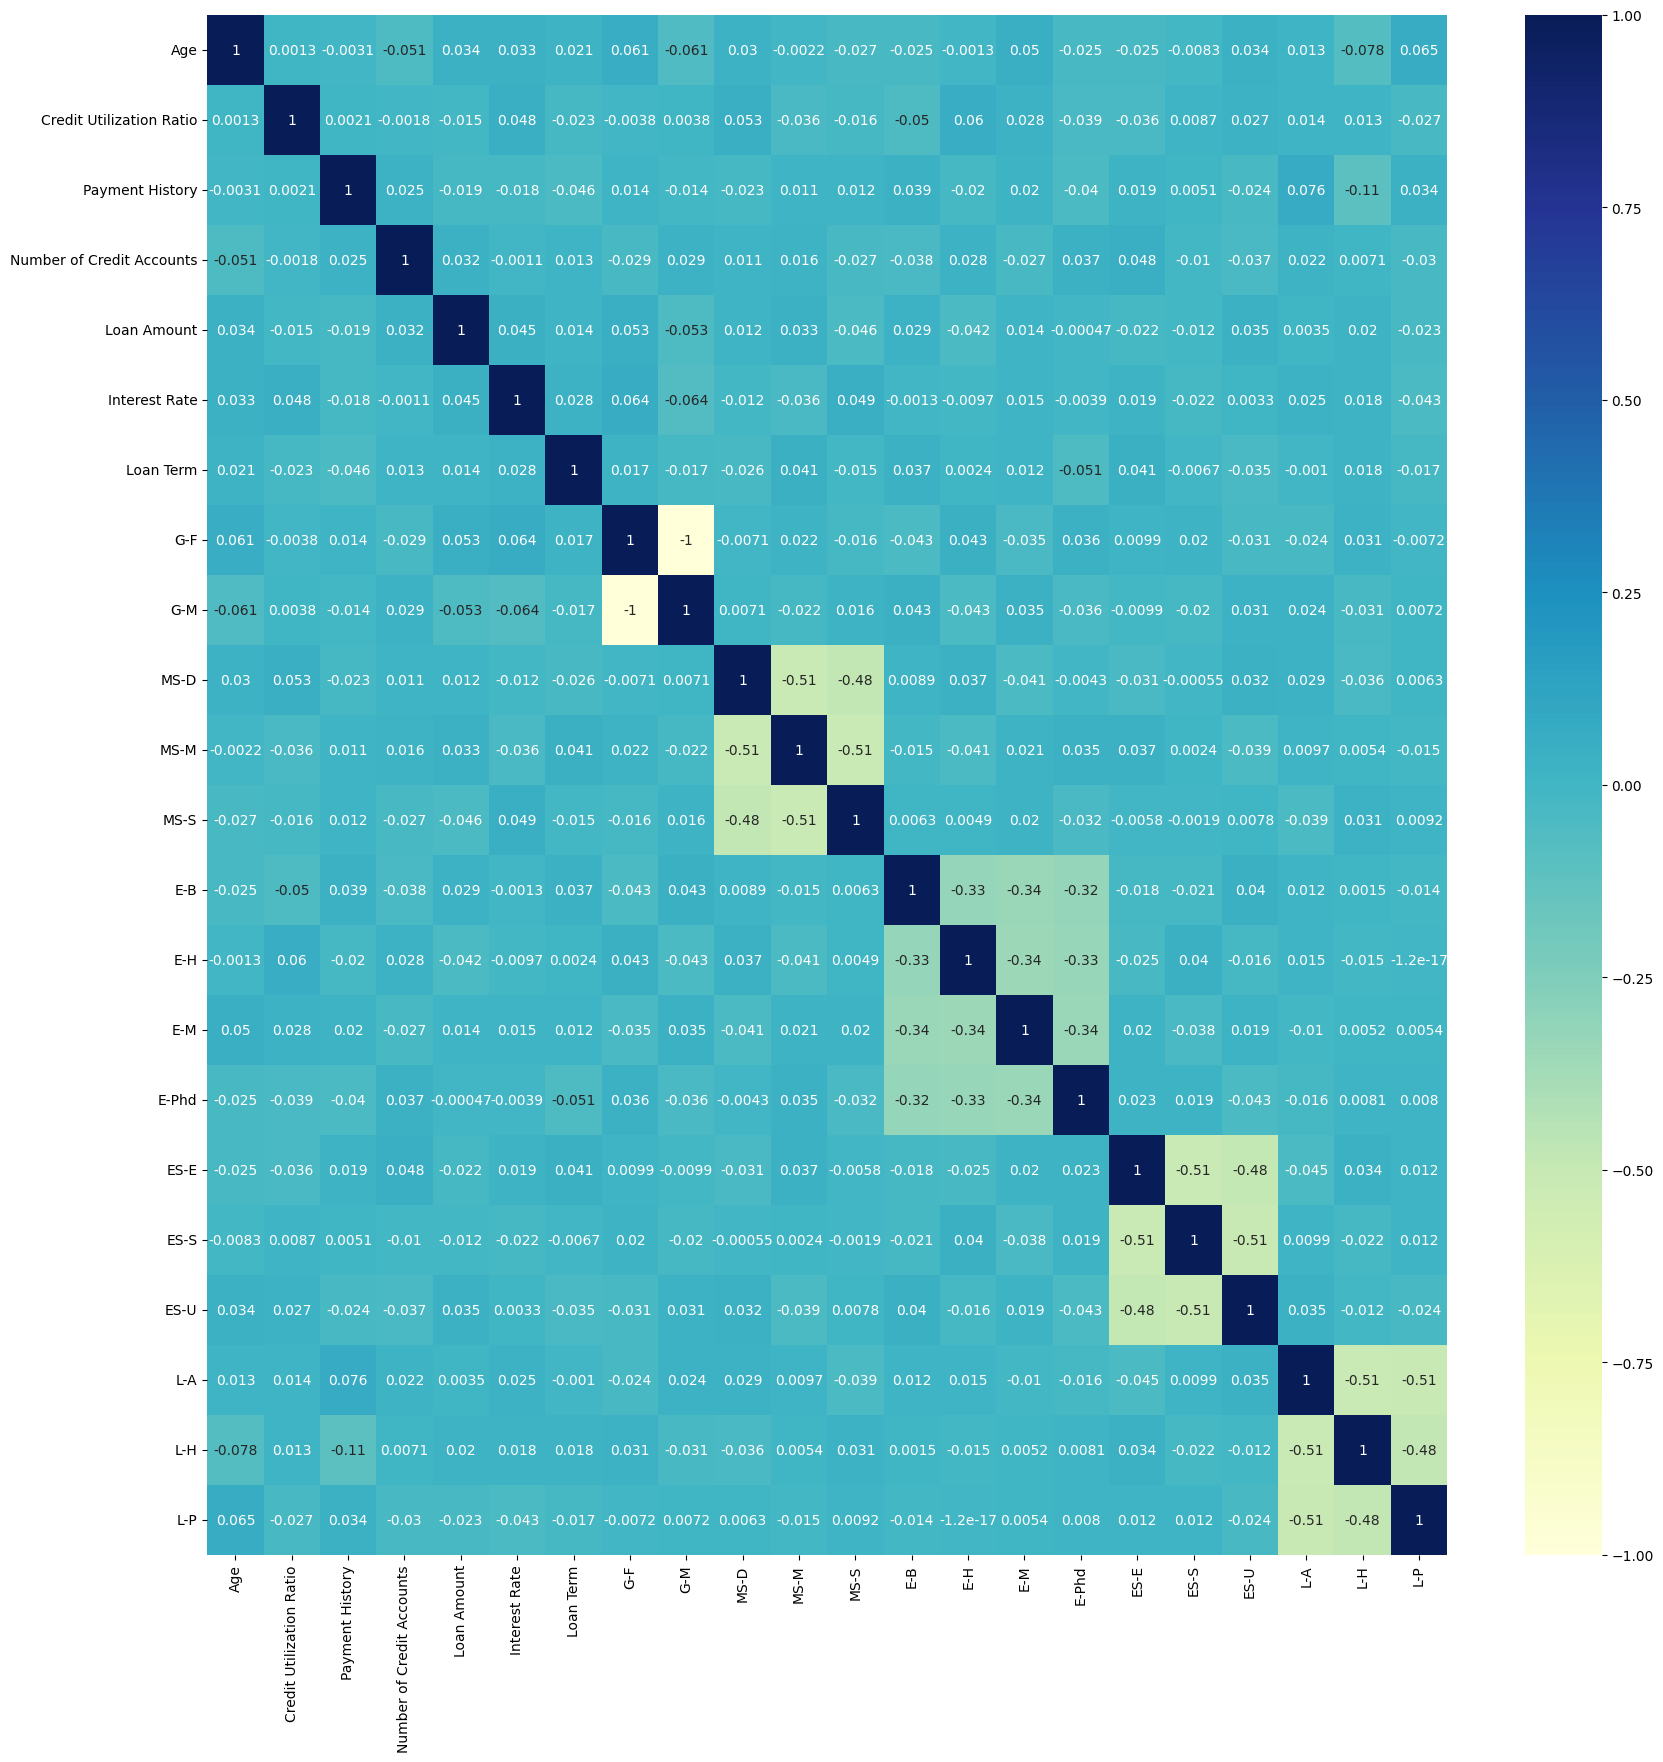

In [23]:
correlation_matrix(new_data)

There is a corelation between each type of encoder (Gender - Martial Status- Education - Employed Status - Loan Type)

--> Therefore, reduce each of type of feature --> Reduced 5 features

In [26]:
## Feature Scaling Down to zone 0-1 if ML method sensible with the range
# Using RandomForest to see feature importance